In [3]:
%load_ext autoreload
%autoreload 2

# Adding parent folder to path
import sys
sys.path.insert(1, '../')
# Getting info to connect terminal to ipython kernel
from IPython.lib import kernel
print('jupyter console --existing {}'.format(kernel.get_connection_file()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
jupyter console --existing /home/rodrigo/.local/share/jupyter/runtime/kernel-56e3780d-83f8-4660-befa-3246c8f8a04d.json


In [5]:
from public_expenses_inspector.models.ente import Ente
from public_expenses_inspector.models.mscOrcamentaria import MscOrcamentaria
from public_expenses_inspector.models.budgetSummary import BudgetSummary
from sqlalchemy.orm import sessionmaker
import pandas as pd


In [11]:
from dotenv import load_dotenv
load_dotenv()
import os

from sqlalchemy import create_engine

engine = create_engine('{}://{}:{}@{}/{}'.format(
    os.getenv('DB_ENGINE'),
    os.getenv('DB_USERNAME'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_URL'),
    os.getenv('DB_NAME')
))


In [29]:
from sqlalchemy import func

Session = sessionmaker()
Session.configure(bind = engine)
session = Session()

sub_fun_groups = (
    session.query(MscOrcamentaria.cod_ibge,MscOrcamentaria.subfuncao,MscOrcamentaria.an_referencia,func.sum(MscOrcamentaria.valor).label('total'))
    .group_by(MscOrcamentaria.cod_ibge)
    .group_by(MscOrcamentaria.subfuncao)
    .group_by(MscOrcamentaria.an_referencia)
    .all()
)

ente_groups = (
    session.query(MscOrcamentaria.cod_ibge, MscOrcamentaria.an_referencia, func.sum(MscOrcamentaria.valor).label('total'))
    .group_by(MscOrcamentaria.cod_ibge)
    .group_by(MscOrcamentaria.an_referencia)
    .all()
)


In [40]:
df_sub_fun = pd.DataFrame(sub_fun_groups)
df_ente = pd.DataFrame(ente_groups)
df_ente = df_ente.set_index('cod_ibge')

df_sub_fun['total_percent'] = df_sub_fun.apply( lambda row: row['total']/df_ente.loc[row['cod_ibge'], 'total'], axis = 1 )

In [58]:
sub_funs = {"031":"Ação Legislativa","032":"Controle Externo","061":"Ação Judiciária","062":"Defesa do Interesse Público no Processo Judiciário","091":"Defesa da Ordem Jurídica","092":"Representação Judicial e Extrajudicial","121":"Planejamento e Orçamento","122":"Administração Geral","123":"Administração Financeira","124":"Controle Interno","125":"Normatização e Fiscalização","126":"Tecnologia da Informação","127":"Ordenamento Territorial","128":"Formação de Recursos Humanos","129":"Administração de Receitas","130":"Administração de Concessões","131":"Comunicação Social","151":"Defesa Aérea","152":"Defesa Naval","153":"Defesa Terrestre","181":"Policiamento","182":"Defesa Civil","183":"Informação e Inteligência","211":"Relações Diplomáticas","212":"Cooperação Internacional","241":"Assistência ao Idoso","242":"Assistência ao Portador de Deficiência","243":"Assistência à Criança e ao Adolescente","244":"Assistência Comunitária","271":"Previdência Básica","272":"Previdência do Regime Estatutário","273":"Previdência Complementar","274":"Previdência Especial","301":"Atenção Básica","302":"Assistência Hospitalar e Ambulatorial","303":"Suporte Profilático e Terapêutico","304":"Vigilância Sanitária","305":"Vigilância Epidemiológica","306":"Alimentação e Nutrição","331":"Proteção e Benefícios ao Trabalhador","332":"Relações de Trabalho","333":"Empregabilidade","334":"Fomento ao Trabalho","362":"Ensino Médio","363":"Ensino Profissional","364":"Ensino Superior","365":"Educação Infantil","366":"Educação de Jovens e Adultos","367":"Educação Especial","368":"Educação Básica (4)","391":"Patrimônio Histórico, Artístico e Arqueológico","392":"Difusão Cultural","421":"Custódia e Reintegração Social","422":"Direitos Individuais, Coletivos e Difusos","423":"Assistência aos Povos Indígenas","451":"Infra-Estrutura Urbana","452":"Serviços Urbanos","453":"Transportes Coletivos Urbanos","481":"Habitação Rural","482":"Habitação Urbana","511":"Saneamento Básico Rural","512":"Saneamento Básico Urbano","541":"Preservação e Conservação Ambiental","542":"Controle Ambiental","543":"Recuperação de Áreas Degradadas","544":"Recursos Hídricos","545":"Meteorologia","571":"Desenvolvimento Científico","572":"Desenvolvimento Tecnológico e Engenharia","573":"Difusão do Conhecimento Científico e Tecnológico","601":"Promoção da Produção Vegetal","602":"Promoção da Produção Animal","603":"Defesa Sanitária Vegetal","604":"Defesa Sanitária Animal","605":"Abastecimento","606":"Extensão Rural","607":"Irrigação","631":"Reforma Agrária","632":"Colonização","661":"Promoção Industrial","662":"Produção Industrial","663":"Mineração","664":"Propriedade Industrial","665":"Normalização e Qualidade","691":"Promoção Comercial","692":"Comercialização","693":"Comércio Exterior","694":"Serviços Financeiros","695":"Turismo","721":"Comunicações Postais","722":"Telecomunicações","751":"Conservação de Energia","752":"Energia Elétrica","753":"Combustíveis Minerais (3)","754":"Biocombustíveis (3)","781":"Transporte Aéreo","782":"Transporte Rodoviário","783":"Transporte Ferroviário","784":"Transporte Hidroviário","785":"Transportes Especiais","811":"Desporto de Rendimento","812":"Desporto Comunitário","813":"Lazer","841":"Refinanciamento da Dívida Interna","842":"Refinanciamento da Dívida Externa","843":"Serviço da Dívida Interna","844":"Serviço da Dívida Externa","845":"Outras Transferências (1)","846":"Outros Encargos Especiais","847":"Transferências para a Educação Básica (2)"}

000
001
010
Ação Legislativa
Controle Externo
Ação Judiciária
Defesa do Interesse Público no Processo Judiciário
Defesa da Ordem Jurídica
Representação Judicial e Extrajudicial
Planejamento e Orçamento
Administração Geral
Administração Financeira
Controle Interno
Normatização e Fiscalização
Tecnologia da Informação
Ordenamento Territorial
Formação de Recursos Humanos
Administração de Receitas
Administração de Concessões
Comunicação Social
Defesa Aérea
Defesa Naval
Defesa Terrestre
Policiamento
Defesa Civil
Informação e Inteligência
Relações Diplomáticas
Cooperação Internacional
Assistência ao Idoso
Assistência ao Portador de Deficiência
Assistência à Criança e ao Adolescente
Assistência Comunitária
Previdência Básica
Previdência do Regime Estatutário
Previdência Complementar
Previdência Especial
Atenção Básica
Assistência Hospitalar e Ambulatorial
Suporte Profilático e Terapêutico
Vigilância Sanitária
Vigilância Epidemiológica
Alimentação e Nutrição
Proteção e Benefícios ao Trabalhador

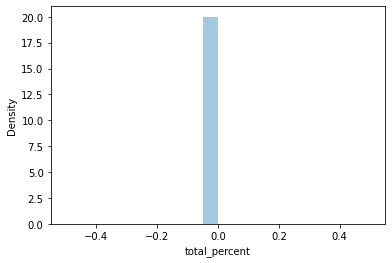

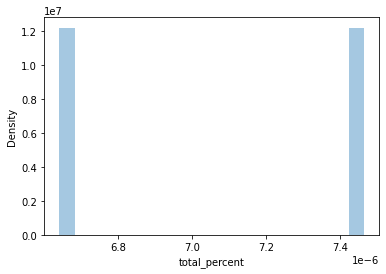

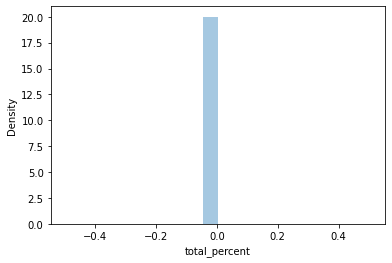

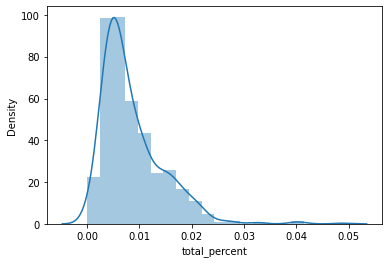

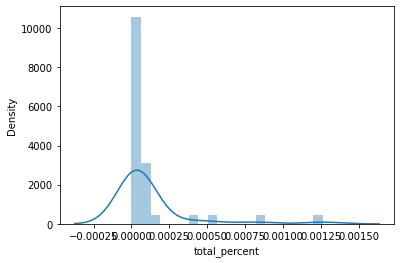

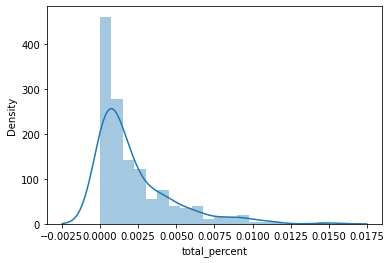

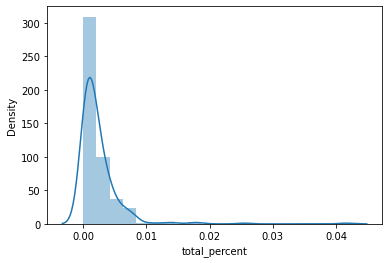

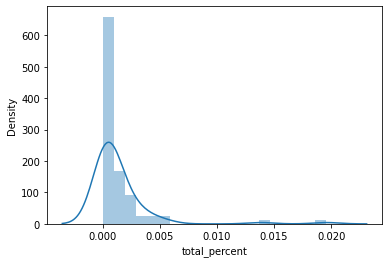

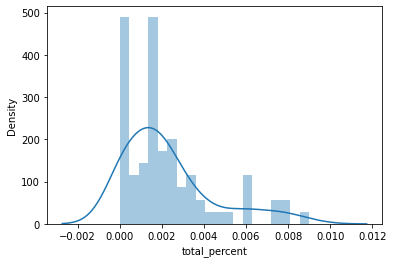

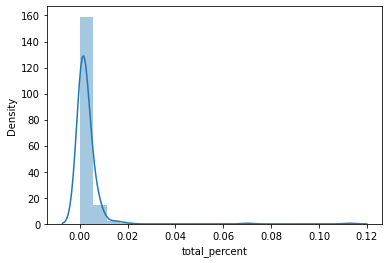

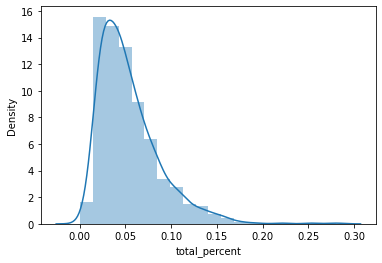

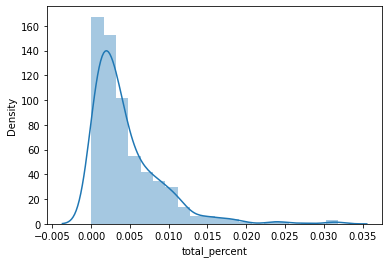

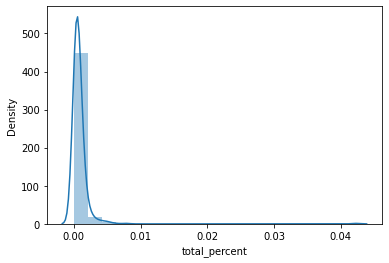

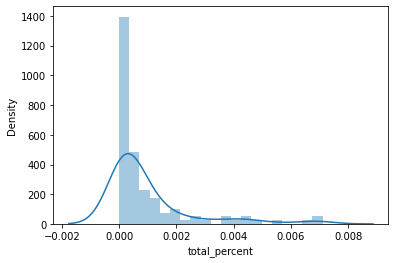

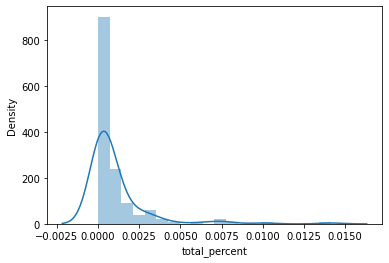

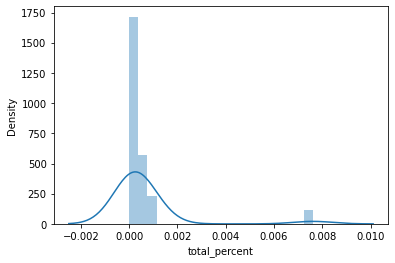

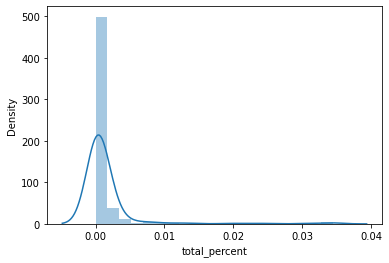

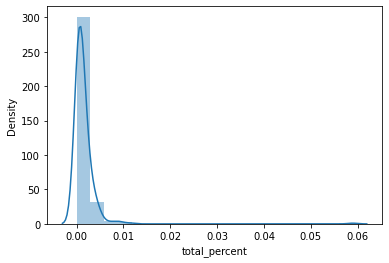

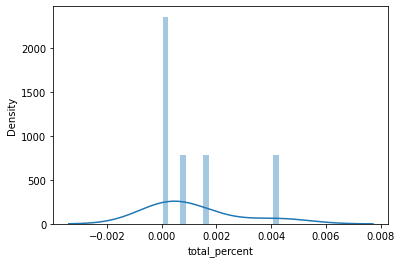

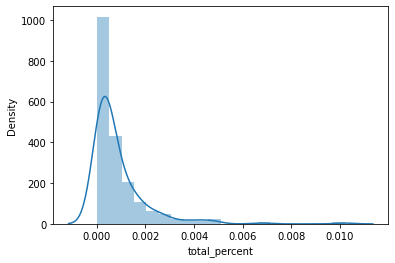

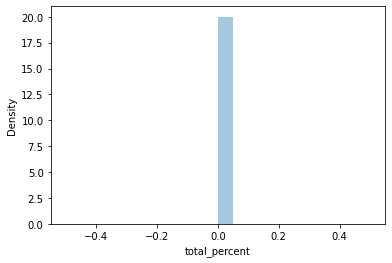

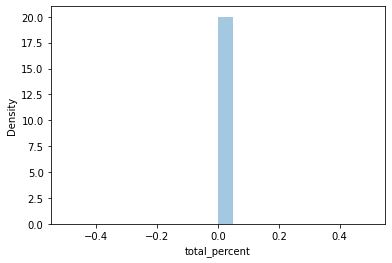

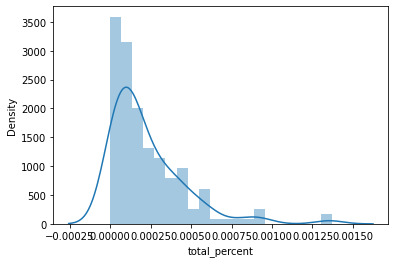

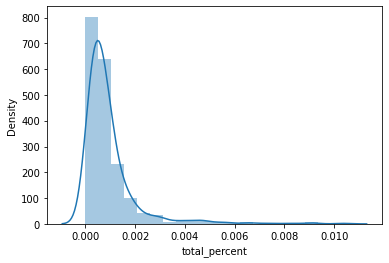

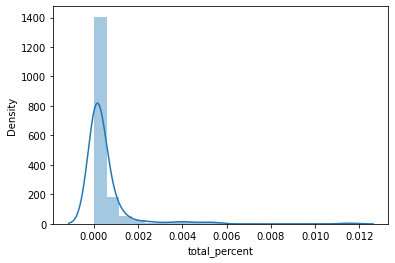

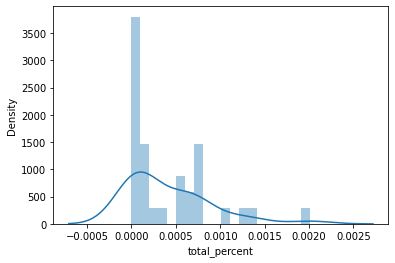

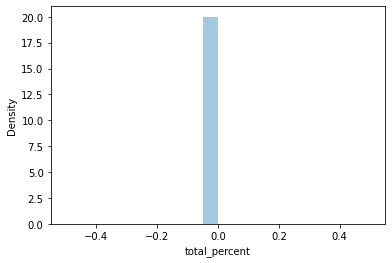

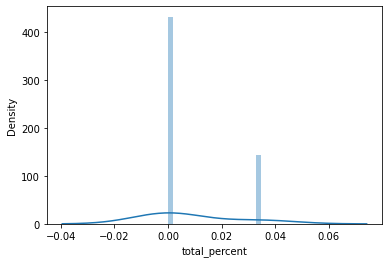

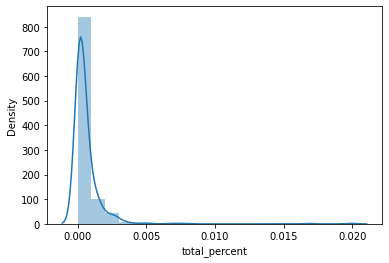

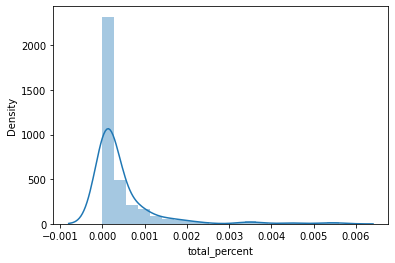

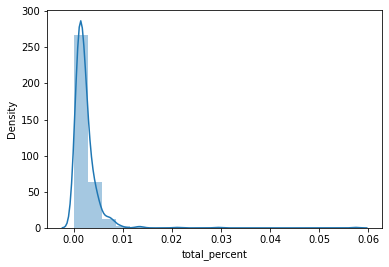

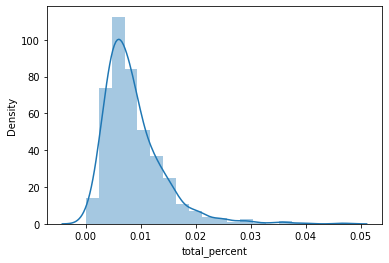

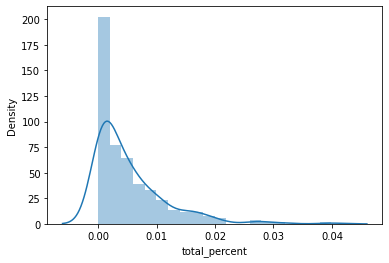

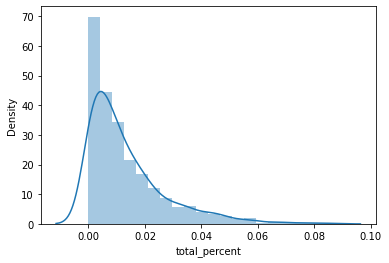

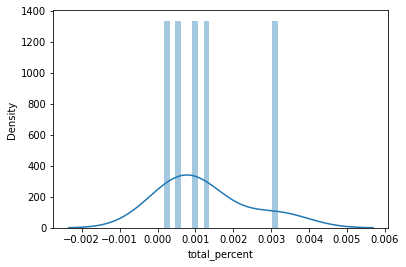

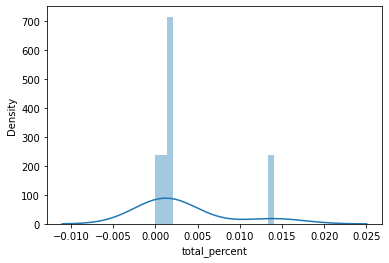

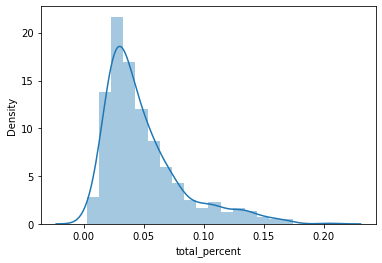

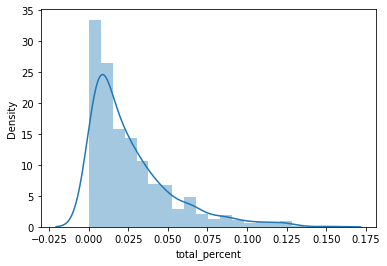

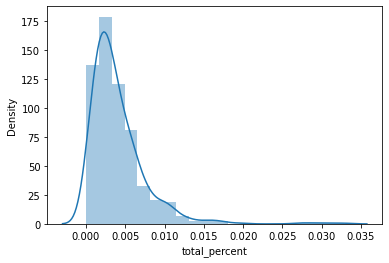

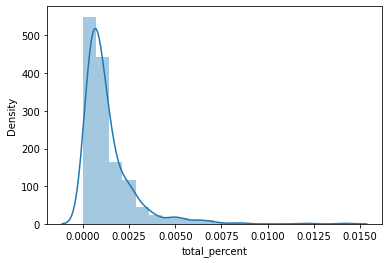

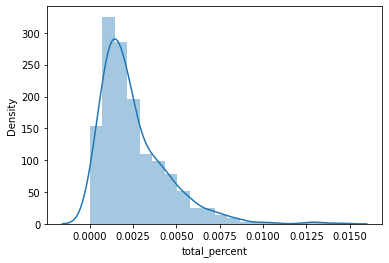

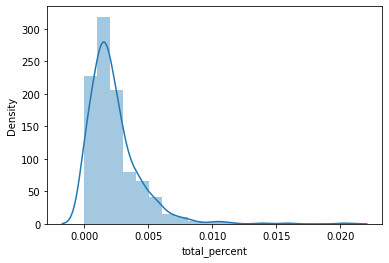

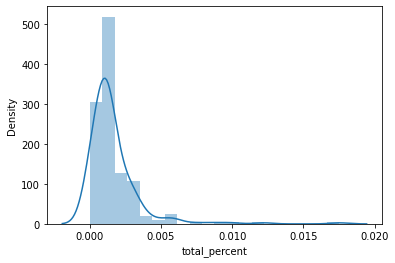

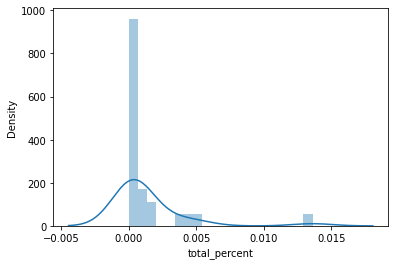

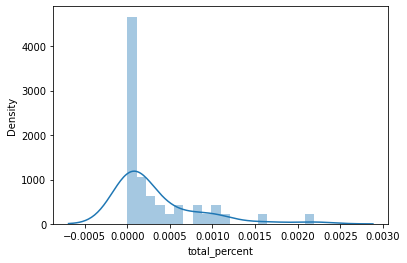

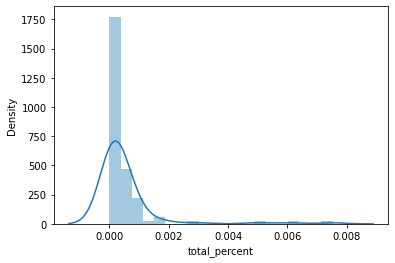

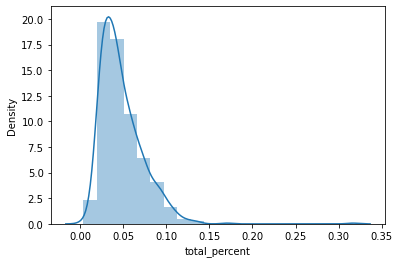

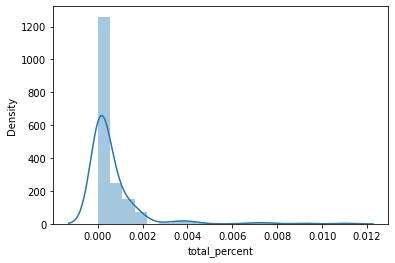

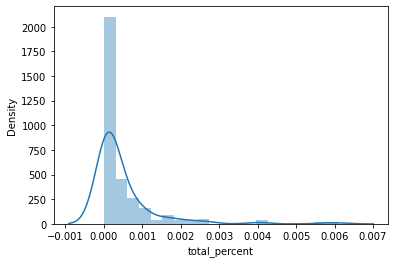

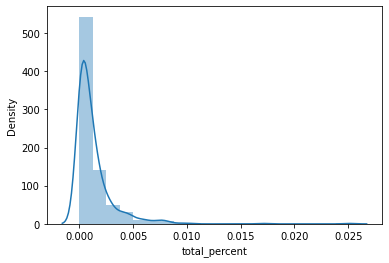

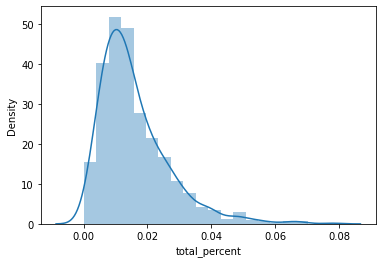

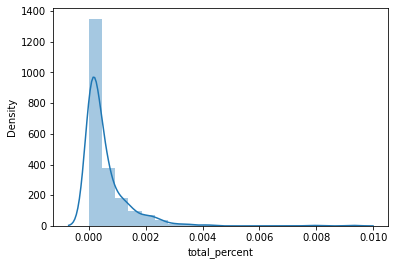

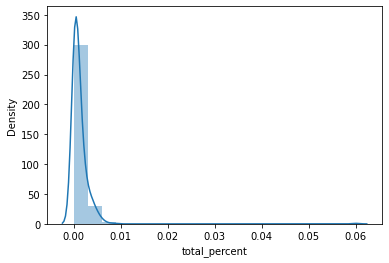

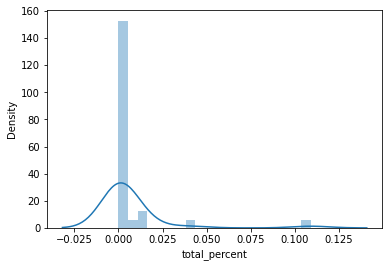

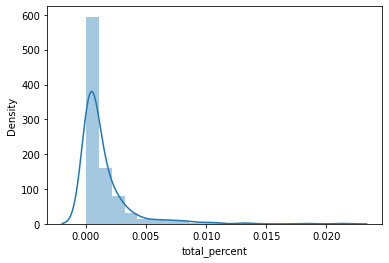

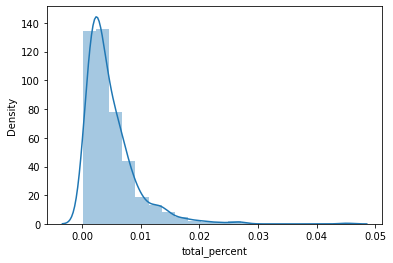

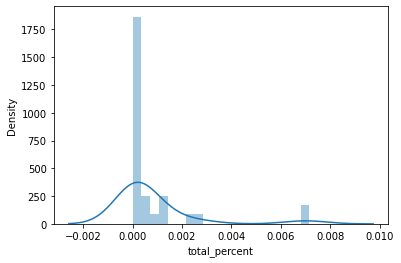

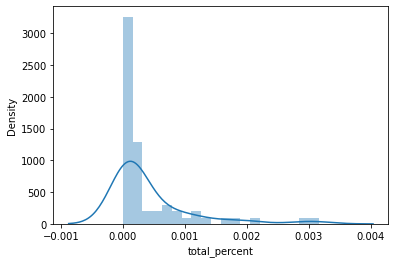

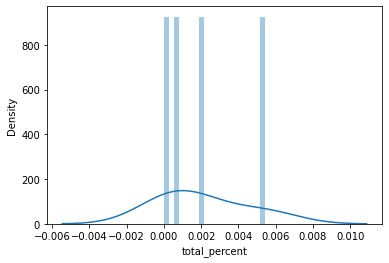

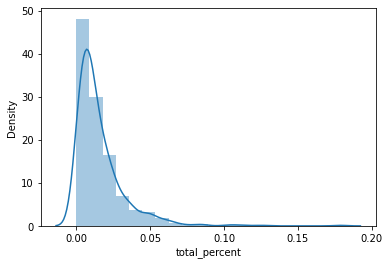

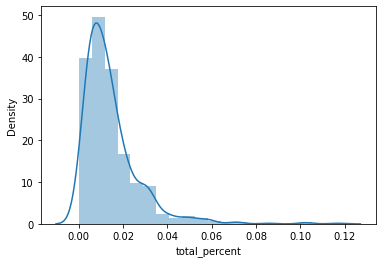

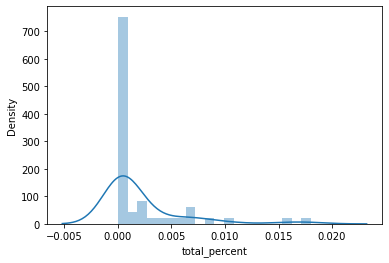

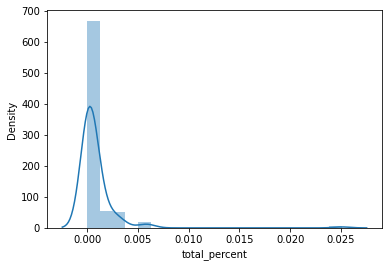

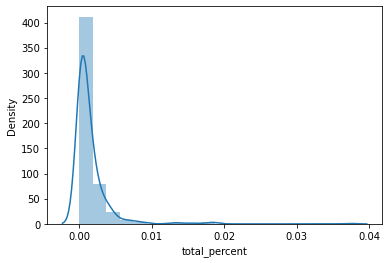

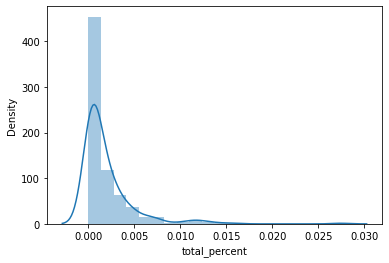

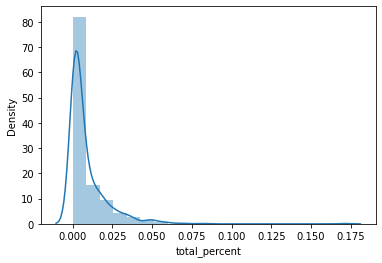

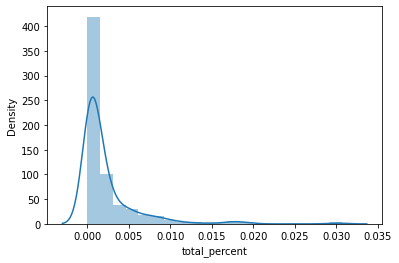

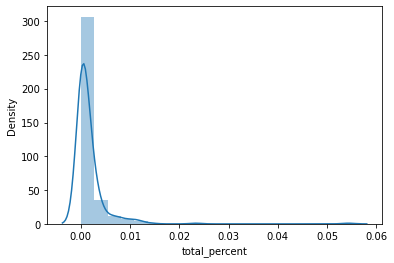

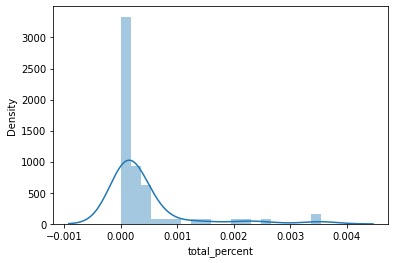

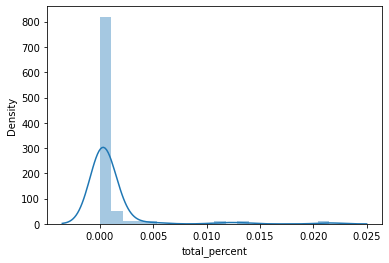

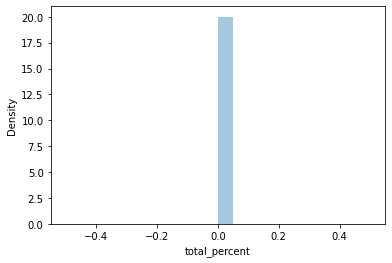

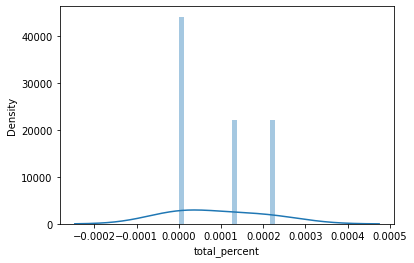

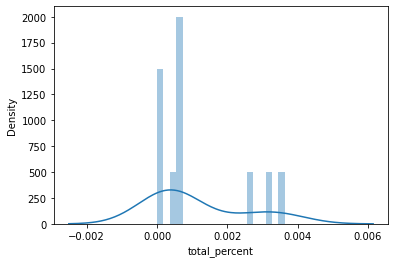

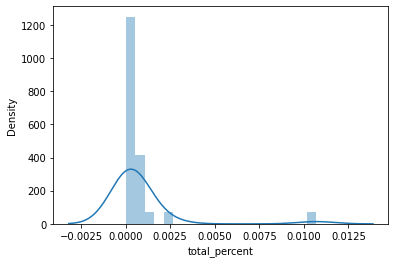

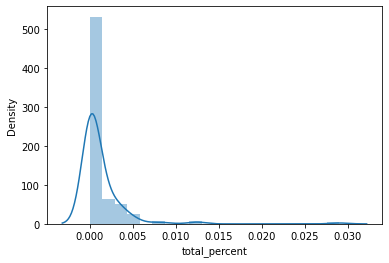

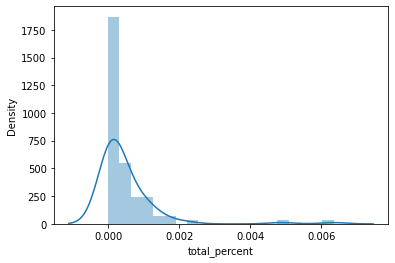

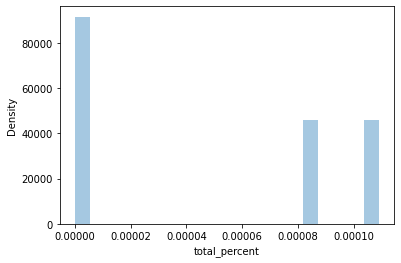

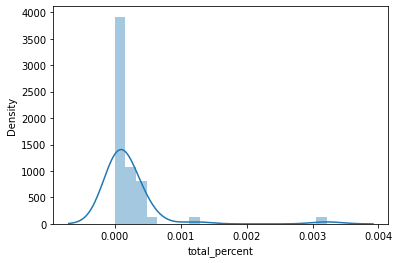

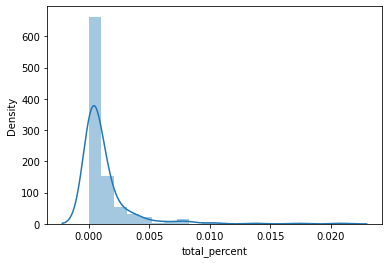

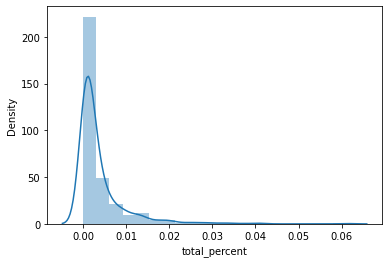

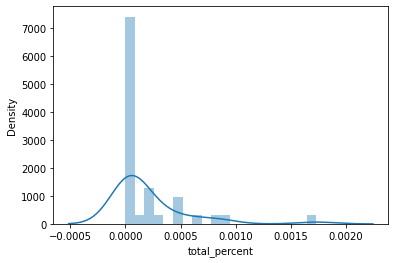

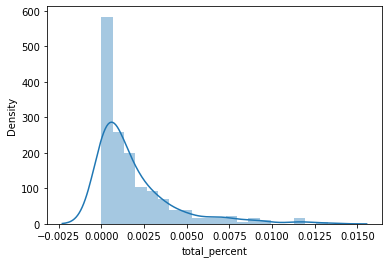

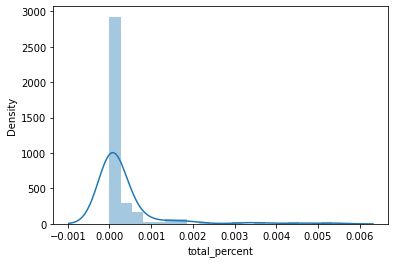

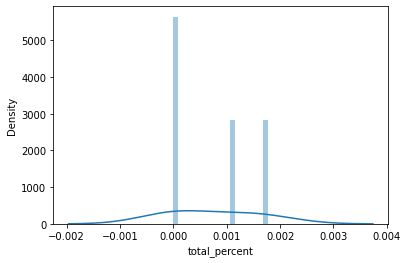

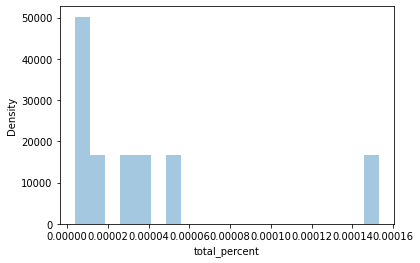

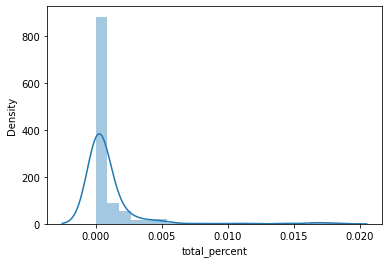

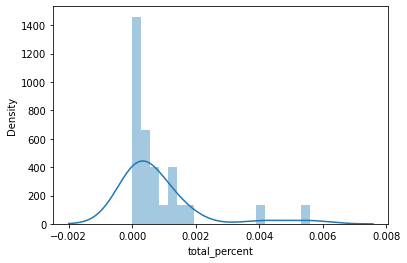

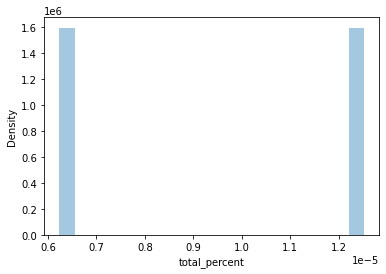

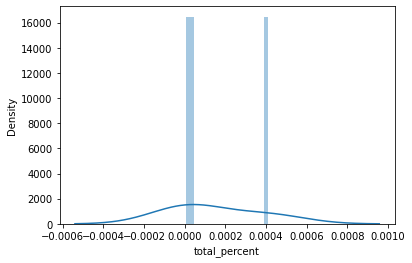

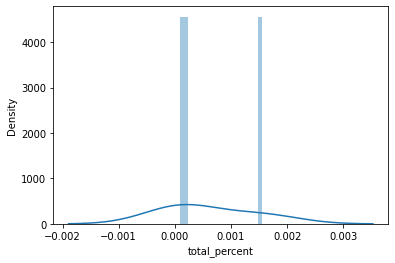

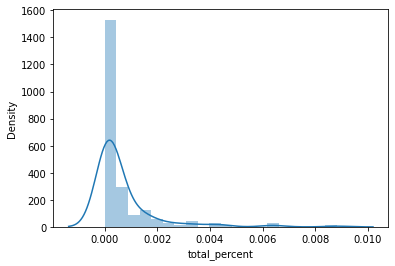

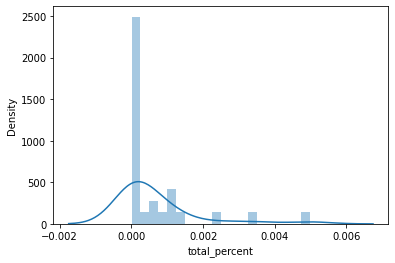

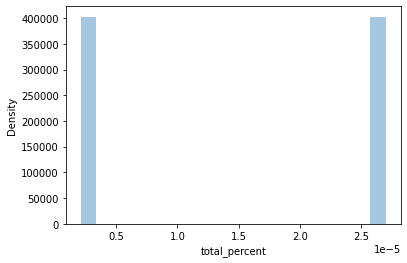

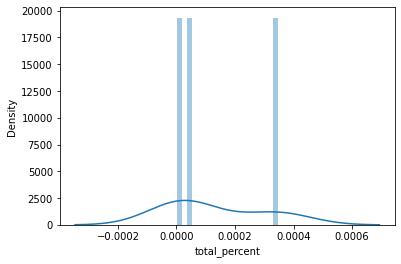

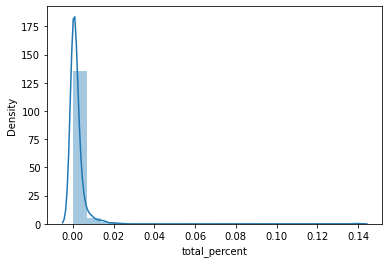

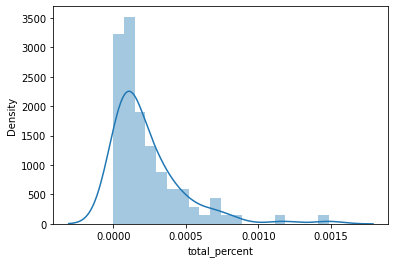

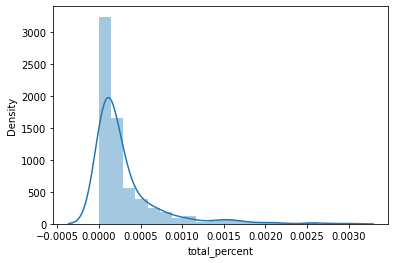

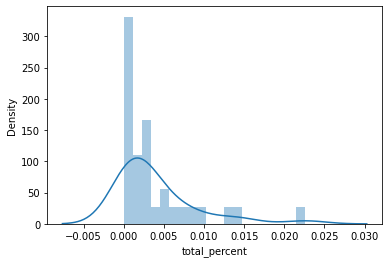

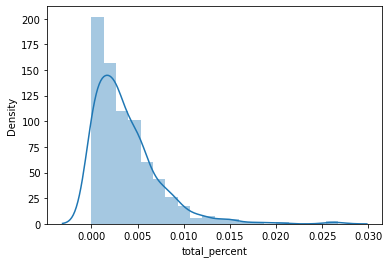

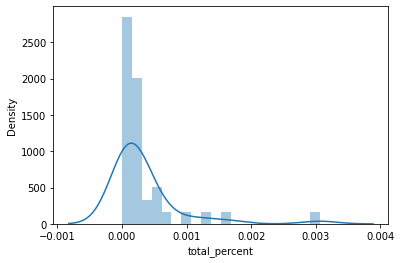

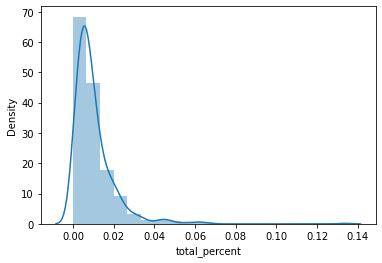

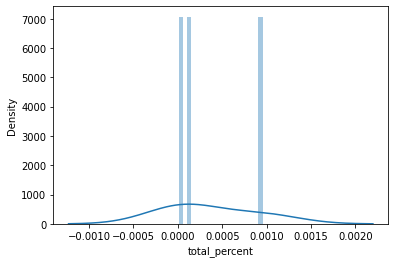

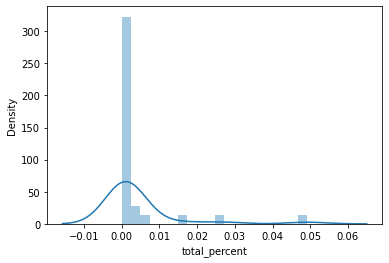

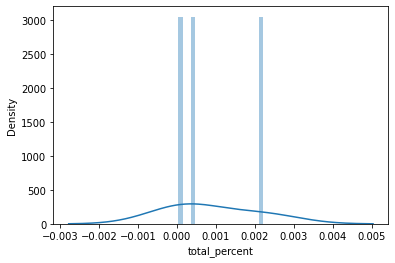

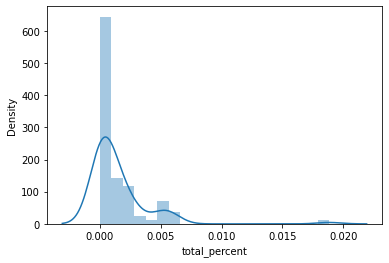

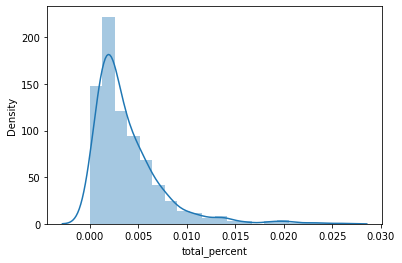

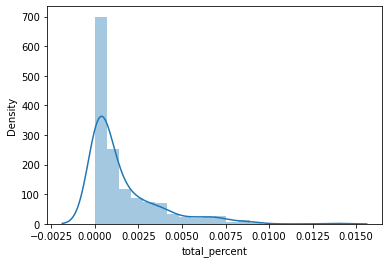

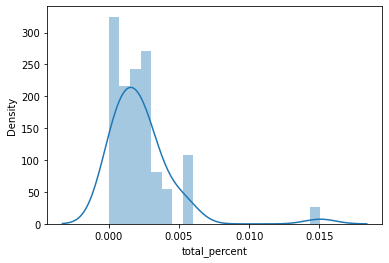

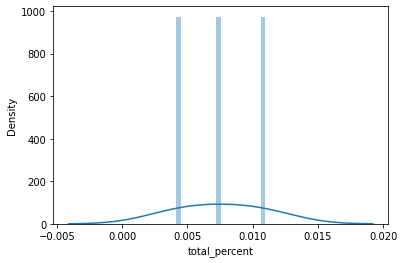

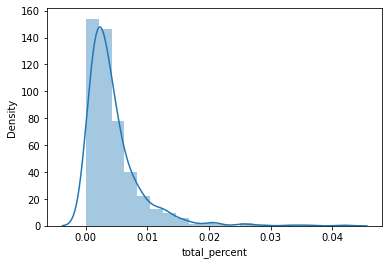

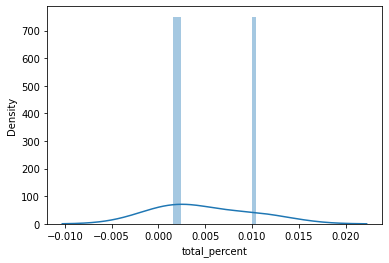

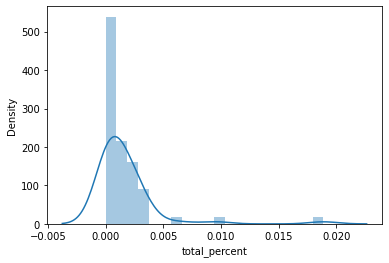

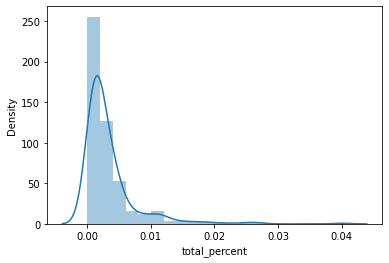

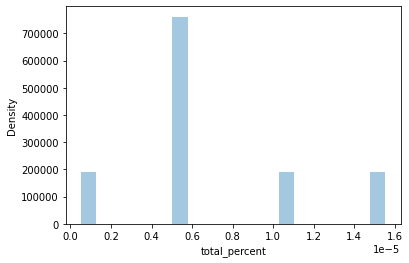

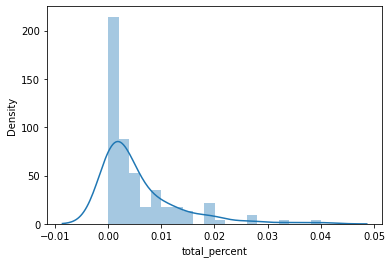

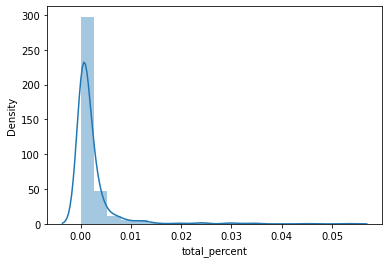

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subfun_grp = df_sub_fun.groupby('subfuncao')
for key in df_subfun_grp.groups.keys():
    fig = plt.figure()
    try:
        fig.suptitle(sub_funs[key], fontsize=12)
    except:
        fig.suptitle(key, fontsize=12)
    sns.distplot(df_subfun_grp.get_group(key)['total_percent'], bins = 20)